### IMPORT LIBRARY

In [48]:
import numpy as np #Komputasi numerik atau pembuatan array
import matplotlib.pyplot as plt #Visualisasi data
from keras.layers import Input, Dense #Membantu proses untuk encoding dan decoding
from keras.models import Model #Memanggil model dari library keras
from keras.datasets import mnist #Dataset yang digunakan

### DATA PREPOCESSING

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
#Normalisasi pada Dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
x_train = np.reshape(x_train,
                    (x_train.shape[0], 784))
x_test = np.reshape(x_test,
                   (x_test.shape[0], 784))

In [53]:
x_train.shape

(60000, 784)

### MODELLING

In [54]:
inputs = Input(shape = (784,))
h_encode = Dense(512, activation = 'relu')(inputs)
h_encode = Dense(256, activation = 'relu')(h_encode)
h_encode = Dense(128, activation = 'relu')(h_encode)
h_encode = Dense(64, activation = 'relu')(h_encode)

coded = Dense(32, activation = 'relu')(h_encode)

h_decode = Dense(64, activation = 'relu')(coded)
h_decode = Dense(128, activation = 'relu')(h_decode)
h_decode = Dense(256, activation = 'relu')(h_decode)
h_decode = Dense(512, activation = 'relu')(h_decode)

outputs = Dense(784, activation = 'sigmoid')(h_decode)
autoencoder = Model(inputs, outputs)

### TRAINING MODEL

In [55]:
autoencoder.compile(optimizer = 'adam',
                    loss = 'mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs = 10,
                batch_size = 100,
                shuffle = True,
                validation_data = (x_test, x_test))

Epoch 1/10
600/600 [==============================] - 18s 29ms/step - loss: 0.0443 - val_loss: 0.0255
Epoch 2/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0223 - val_loss: 0.0194
Epoch 3/10
600/600 [==============================] - 18s 30ms/step - loss: 0.0180 - val_loss: 0.0163
Epoch 4/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0156 - val_loss: 0.0145
Epoch 5/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0141 - val_loss: 0.0132
Epoch 6/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0128 - val_loss: 0.0122
Epoch 7/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 8/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 9/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 10/10
600/600 [==============================] - 15s 25ms/step - loss: 0.010

### PREDICT & VISUALIZATION

In [56]:
predicted = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


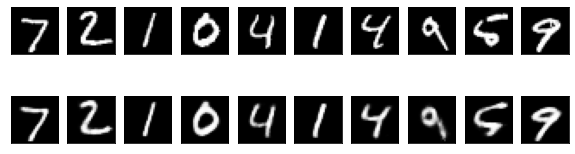

In [59]:
n = 10
plt.figure(figsize = (10, 3))

for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(predicted[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()